In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [78]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [79]:
mappings={
    'setosa':0,
    'versicolor':1,
    'virginica':2
}
df['species']=df['species'].map(mappings)

In [80]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [81]:
df=df.drop(['sepal_width','petal_width'],axis=1)

In [82]:
x=df.iloc[:,:2]
y=df.iloc[:,2]
df['weights']=1/df.shape[0]

[Text(0.5, 0.75, 'x[1] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.625, 0.5, '  False')]

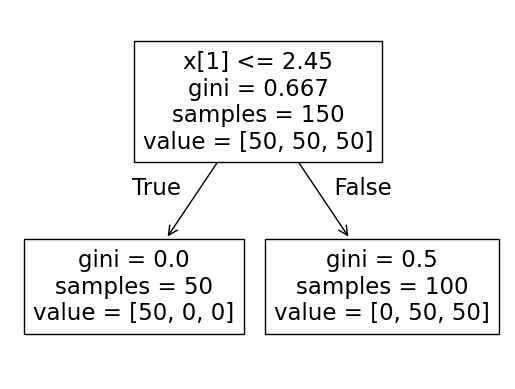

In [83]:
dt.fit(x,y)
from sklearn.tree import plot_tree
plot_tree(dt)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

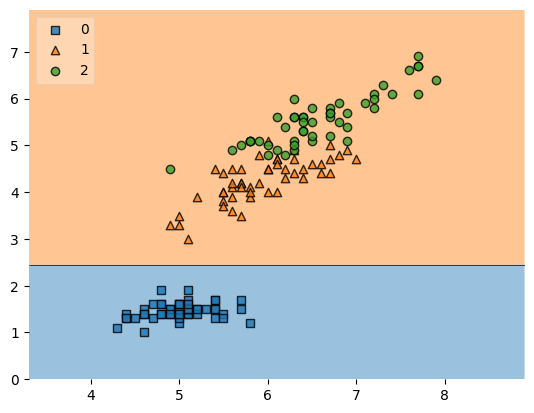

In [84]:
import numpy as np
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt,legend=2)

In [85]:
ypred=dt.predict(x)
df['ypred']=ypred
df

,sepal_length,petal_length,species,weights,ypred
0,5.1,1.4,0,0.006667,0
1,4.9,1.4,0,0.006667,0
2,4.7,1.3,0,0.006667,0
3,4.6,1.5,0,0.006667,0
4,5.0,1.4,0,0.006667,0
...,...,...,...,...,...
145,6.7,5.2,2,0.006667,1
146,6.3,5.0,2,0.006667,1
147,6.5,5.2,2,0.006667,1
148,6.2,5.4,2,0.006667,1


In [86]:
def calculate_weight(error):
  return  0.5*np.log((1-error)/(error))

In [87]:
alpha1=calculate_weight(accuracy_score(y,ypred))
alpha1

np.float64(-0.34657359027997253)

In [88]:
def update_row_weights(row,alpha=0.423):
  if row['species'] == row['ypred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)


In [89]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)
df

,sepal_length,petal_length,species,weights,ypred,updated_weights
0,5.1,1.4,0,0.006667,0,0.004367
1,4.9,1.4,0,0.006667,0,0.004367
2,4.7,1.3,0,0.006667,0,0.004367
3,4.6,1.5,0,0.006667,0,0.004367
4,5.0,1.4,0,0.006667,0,0.004367
...,...,...,...,...,...,...
145,6.7,5.2,2,0.006667,1,0.010177
146,6.3,5.0,2,0.006667,1,0.010177
147,6.5,5.2,2,0.006667,1,0.010177
148,6.2,5.4,2,0.006667,1,0.010177


In [90]:
df['updated_weights'].sum()


np.float64(0.9455638540633564)

In [91]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
df['nomalized_weights'].sum()

np.float64(1.0000000000000002)

In [92]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']
df

,sepal_length,petal_length,species,weights,ypred,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
0,5.1,1.4,0,0.006667,0,0.004367,0.004619,0.004619,0.000000
1,4.9,1.4,0,0.006667,0,0.004367,0.004619,0.009237,0.004619
2,4.7,1.3,0,0.006667,0,0.004367,0.004619,0.013856,0.009237
3,4.6,1.5,0,0.006667,0,0.004367,0.004619,0.018474,0.013856
4,5.0,1.4,0,0.006667,0,0.004367,0.004619,0.023093,0.018474
...,...,...,...,...,...,...,...,...,...
145,6.7,5.2,2,0.006667,1,0.010177,0.010763,0.956949,0.946186
146,6.3,5.0,2,0.006667,1,0.010177,0.010763,0.967712,0.956949
147,6.5,5.2,2,0.006667,1,0.010177,0.010763,0.978474,0.967712
148,6.2,5.4,2,0.006667,1,0.010177,0.010763,0.989237,0.978474


In [93]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices
df_index=create_new_dataset(df)

In [94]:
df_index

[110,
 78,
 115,
 76,
 56,
 134,
 91,
 112,
 106,
 97,
 143,
 116,
 97,
 33,
 148,
 56,
 129,
 116,
 65,
 39,
 83,
 39,
 147,
 33,
 114,
 51,
 107,
 125,
 73,
 6,
 110,
 145,
 108,
 9,
 144,
 148,
 141,
 0,
 148,
 85,
 114,
 134,
 67,
 103,
 117,
 121,
 127,
 46,
 56,
 36,
 118,
 120,
 146,
 0,
 127,
 35,
 36,
 123,
 94,
 147,
 127,
 54,
 137,
 100,
 101,
 127,
 141,
 71,
 139,
 66,
 13,
 143,
 148,
 13,
 25,
 68,
 148,
 124,
 138,
 43,
 139,
 117,
 74,
 117,
 111,
 144,
 147,
 120,
 8,
 123,
 100,
 41,
 103,
 119,
 49,
 129,
 128,
 20,
 124,
 59,
 16,
 138,
 130,
 139,
 120,
 109,
 12,
 120,
 124,
 113,
 116,
 6,
 110,
 56,
 147,
 92,
 10,
 67,
 98,
 143,
 131,
 20,
 114,
 59,
 108,
 128,
 146,
 143,
 38,
 88,
 122,
 148,
 61,
 21,
 115,
 142,
 142,
 134,
 20,
 105,
 118,
 38,
 81,
 37,
 29,
 61,
 11,
 140,
 124,
 71]

In [96]:
df1=df.iloc[df_index,[1,2,3,4]]
df1

,petal_length,species,weights,ypred
110,5.1,2,0.006667,1
78,4.5,1,0.006667,1
115,5.3,2,0.006667,1
76,4.8,1,0.006667,1
56,4.7,1,0.006667,1
...,...,...,...,...
61,4.2,1,0.006667,1
11,1.6,0,0.006667,0
140,5.6,2,0.006667,1
124,5.7,2,0.006667,1


# Adaboost From Scratch

In [98]:
def calculate_weight(error):
    if error == 0:
        return 1e10
    elif error == 1:
        return -1e10
    return 0.5 * np.log((1 - error) / error)

def update_row_weights(df, y_col, alpha):
    def update(row):
        if row[y_col] == row['ypred']:
            return row['weights'] * np.exp(-alpha)
        else:
            return row['weights'] * np.exp(alpha)
    return df.apply(update, axis=1)

def create_new_dataset(df):
    indices = []
    for _ in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a > row['cumsum_lower']:
                indices.append(index)
                break
    return indices

In [131]:
def adaboost(df, x_cols, y_col, n_estimators=100, base_estimator=DecisionTreeClassifier(max_depth=1), plot_each=False):
    models = []
    alphas = []
    df['weights'] = 1 /df.shape[0]

    for t in range(n_estimators):
        x = df[x_cols]
        y = df[y_col]

        dt = base_estimator
        dt.fit(x, y, sample_weight=df['weights'])

        df['ypred'] = dt.predict(x)
        error = np.dot((df['ypred'] != df[y_col]).astype(int), df['weights'])
        alpha = calculate_weight(error)

        df['updated_weights'] = update_row_weights(df, y_col, alpha)

        total_weight = df['updated_weights'].sum()
        if not np.isclose(total_weight, 1.0):
            df['normalized_weights'] = df['updated_weights'] / total_weight
        else:
            df['normalized_weights'] = df['updated_weights']

        df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
        df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']
        if plot_each and len(x_cols) == 2:
            plt.figure(figsize=(6, 4))
            plot_decision_regions(X=x.to_numpy(), y=y.to_numpy(), clf=dt, legend=2)
            plt.title(f"Iteration {t+1} - Decision Region")
            plt.xlabel(x_cols[0])
            plt.ylabel(x_cols[1])

            plt.tight_layout()
            plt.show()
        acc = accuracy_score(df[y_col], df['ypred'])
        print(f"Iteration {t+1}: Error={error:.4f}, Alpha={alpha:.4f}, Accuracy={acc:.4f}")
        sampled_indices = create_new_dataset(df)
        df = df.iloc[sampled_indices].reset_index(drop=True)
        df['weights'] = df['normalized_weights']

        models.append(dt)
        alphas.append(alpha)

    return models, alphas


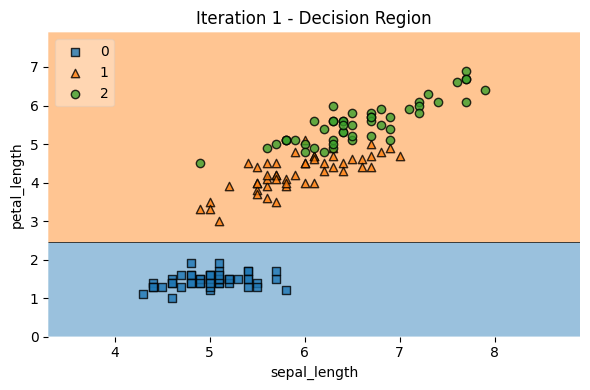

Iteration 1: Error=0.3333, Alpha=0.3466, Accuracy=0.6667


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


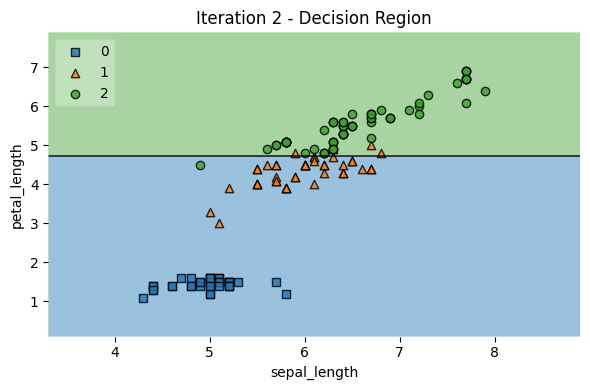

Iteration 2: Error=0.2300, Alpha=0.6042, Accuracy=0.7000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


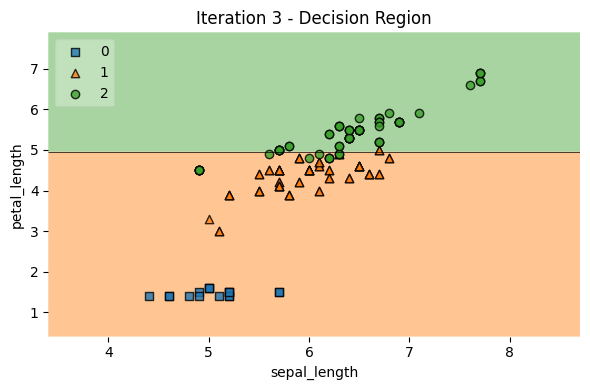

Iteration 3: Error=0.2465, Alpha=0.5587, Accuracy=0.7800


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


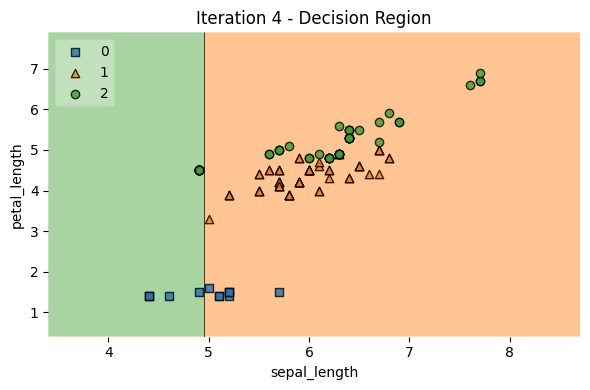

Iteration 4: Error=0.3272, Alpha=0.3605, Accuracy=0.6467


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


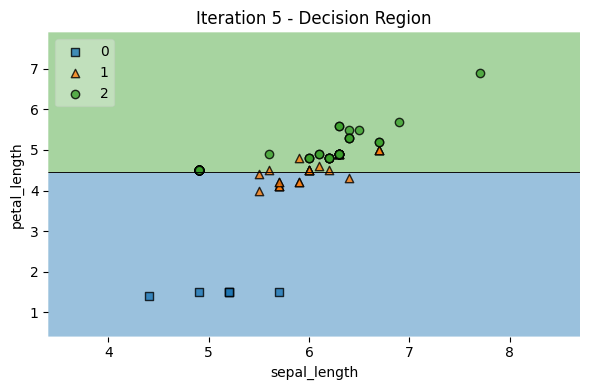

Iteration 5: Error=0.0777, Alpha=1.2371, Accuracy=0.8333


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


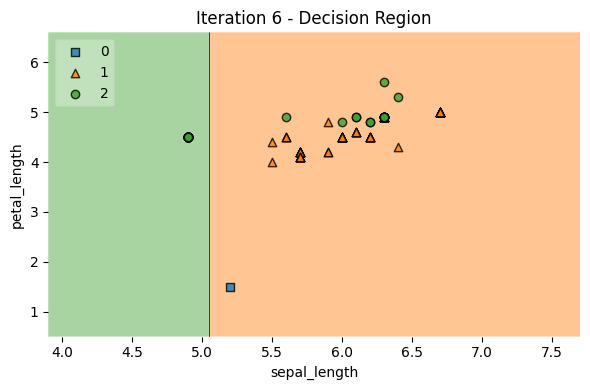

Iteration 6: Error=0.0603, Alpha=1.3729, Accuracy=0.8800


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


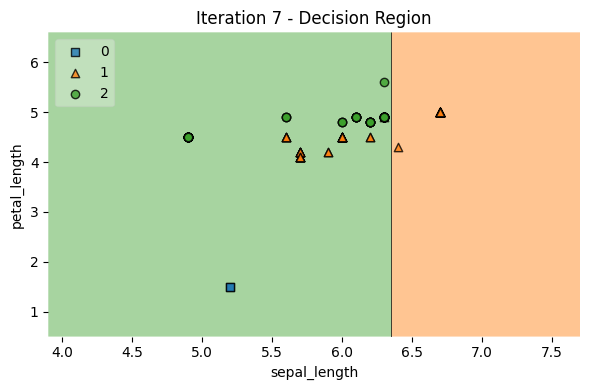

Iteration 7: Error=0.1856, Alpha=0.7395, Accuracy=0.7667


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


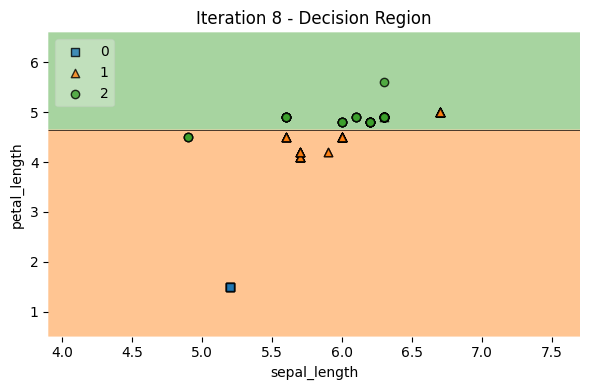

Iteration 8: Error=0.2210, Alpha=0.6299, Accuracy=0.8200


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


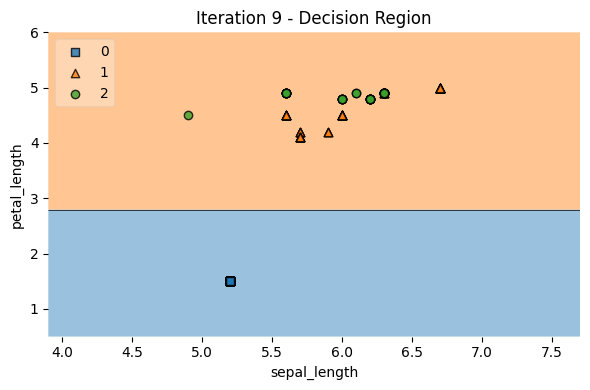

Iteration 9: Error=0.2891, Alpha=0.4499, Accuracy=0.6000


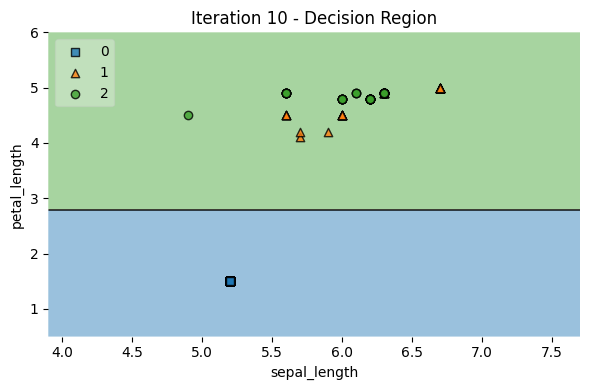

Iteration 10: Error=0.1336, Alpha=0.9348, Accuracy=0.7867


In [132]:
models, alphas = adaboost(
    df=df,
    x_cols=['sepal_length', 'petal_length'],
    y_col='species',
    n_estimators=10,
    plot_each=True
)


In [133]:
df

,sepal_length,petal_length,species,weights,ypred,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower,normalized_weights
0,5.1,1.4,0,0.006667,0,0.004714,0.004619,0.005,0.000,0.005
1,4.9,1.4,0,0.006667,0,0.004714,0.004619,0.010,0.005,0.005
2,4.7,1.3,0,0.006667,0,0.004714,0.004619,0.015,0.010,0.005
3,4.6,1.5,0,0.006667,0,0.004714,0.004619,0.020,0.015,0.005
4,5.0,1.4,0,0.006667,0,0.004714,0.004619,0.025,0.020,0.005
...,...,...,...,...,...,...,...,...,...,...
145,6.7,5.2,2,0.006667,1,0.009428,0.010763,0.960,0.950,0.010
146,6.3,5.0,2,0.006667,1,0.009428,0.010763,0.970,0.960,0.010
147,6.5,5.2,2,0.006667,1,0.009428,0.010763,0.980,0.970,0.010
148,6.2,5.4,2,0.006667,1,0.009428,0.010763,0.990,0.980,0.010


In [134]:
def adaboost_predict(models, alphas, X):
    classes = np.unique(models[0].classes_)
    scores = np.zeros((X.shape[0], len(classes)))

    for model, alpha in zip(models, alphas):
        preds = model.predict(X)
        for i, cls in enumerate(classes):
            scores[:, i] += alpha * (preds == cls).astype(int)

    return classes[np.argmax(scores, axis=1)]


In [136]:
sample = np.array([[5.1, 1.4],[6.7,	5.2	],[5.0,	1.4	]])
prediction = adaboost_predict(models, alphas, sample)
print("Predicted class:", prediction)

Predicted class: [0 2 0]
